### 2.1 Stochastic Process, Time Series, Stationarity, Autocorrelation

#### 1. An observed time series is treated as a **realization** of an underlying probability model.
   
   In probability and statistics, a realization, observation, or observed value, of a random variable is the value that is actually observed.


#### 2. The concept of **(weak) stationarity** is a key requirement of the class of time series models.

   The basic idea of stationarity is that **the probability laws** that govern the behavior of **the process do not change over time**. 
   
   **Strict stationarity:** A time series $\{Z_t\}$ is said to be strictly stationary if the joint distribution of $Z_{t_1}$, $Z_{t_2}$,..., $Z_{t_n}$ is the same as that of $Z_{t_1-k}$,$Z_{t_2-k}$,...,$Z_{t_n-k}$ for all choices of natural number n, all choices of time points $t_1$, $t_2$,...,$t_n$ and all choices of time lag k.
   
   **Weak stationarity:** A time series $\{Z_t\}$ is said to be weakly (second-order, or covariance) stationary if:
   * the mean function $\mu(t)$ is constant over time, and 
   * $\gamma(t,t-k)=\gamma(0,k)$ for all times t and lags k
 

#### 3. **Autocorrelation and partial autocorrelation**

   The **autocovariance function** is defined as 
   
   $\gamma_x{(s,t)}=cov(x_s,x_t)=E[(x_s-\mu_s)(x_t-\mu_t)]\forall{s,t}$
   
   A correlation of a variable with itself at different times is known as **autocorrelation**.
    

### 2.2 Exploratory Time Series Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings; warnings.simplefilter('ignore')
from __future__ import absolute_import, division, print_function

import sys
import os

import pandas as pd
import numpy as np

#### [Time Series Analysis from Statsmodels](http://www.statsmodels.org/dev/tsa.html)

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x)

np.set_printoptions(precision=5,suppress=True)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

sns.set(style='ticks',context='poster')

In [19]:
Sentiment = 'data/sentiment.csv'
Sentiment = pd.read_csv(Sentiment,index_col=0,parse_dates=[0])

C = 'data/citi.csv'
C = pd.read_csv(C, index_col=0, parse_dates=[0])

T10yr = 'data/T10yr.csv'
T10yr = pd.read_csv(T10yr, index_col=0, parse_dates=[0])

In [26]:
bentley = pd.read_csv('data/bentley_bbq_03.csv', index_col=0, parse_dates=[0])

In [30]:
print("Citigroup's stock price:", "\n", C.dtypes, "\n")
print("10 Year Treasury Bond Rate:", "\n", T10yr.dtypes, "\n")
print("University of Michigan: Consumer Sentiment:", "\n", Sentiment.dtypes)

Citigroup's stock price: 
 Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object 

10 Year Treasury Bond Rate: 
 Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object 

University of Michigan: Consumer Sentiment: 
 UMCSENT    float64
dtype: object


In [31]:
bentley.dtypes

Stock Qty Sales All    int64
dtype: object

In [32]:
C.close = C['Close']
T10yr.close = T10yr['Close']

In [36]:
bentley.head()

,Stock Qty Sales All
Stock Trans Date,
2012-01-30,3
2012-01-02,6
2012-02-02,1
2012-03-02,3
2012-06-02,3


### Plots in Exploratory Time Series Analysis

* Time series plot: to visualize the dynamic and evolution of the series
* Histogram or NP Density: to visualize the distribution
* Sample ACF and PACF graphs: to examine autocorrelation and partial autocorrelation
* Scatterplot matrix on lags: an alternative way to visualize autocorrelation of the series

In [37]:
Sentiment.head()

,UMCSENT
DATE,
2000-01-01,112.00000
2000-02-01,111.30000
2000-03-01,107.10000
2000-04-01,109.20000
2000-05-01,110.70000


In [38]:
# Select the series from 2005 - 2016
sentiment_short = Sentiment.ix['2005':'2016']

In [40]:
sentiment_short.index[:5]

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [41]:
print(sentiment_short.dtypes)

UMCSENT    float64
dtype: object


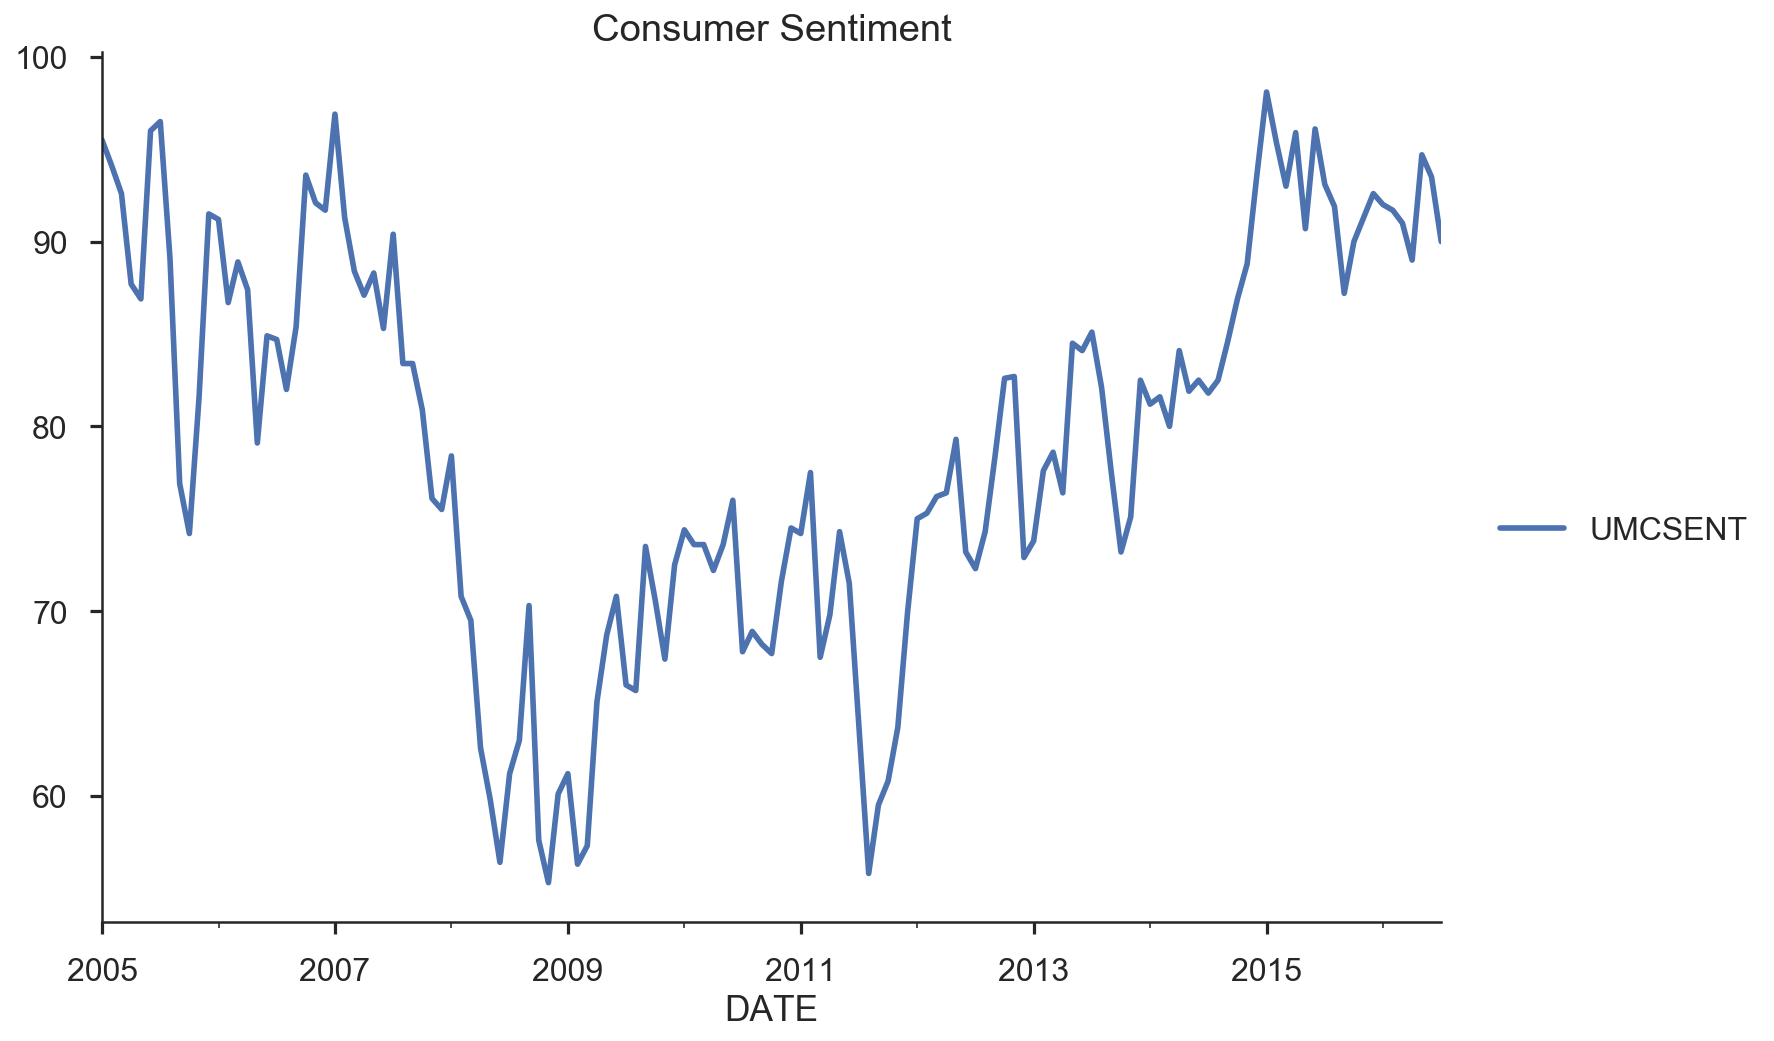

In [43]:
sentiment_short.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title('Consumer Sentiment')
sns.despine()

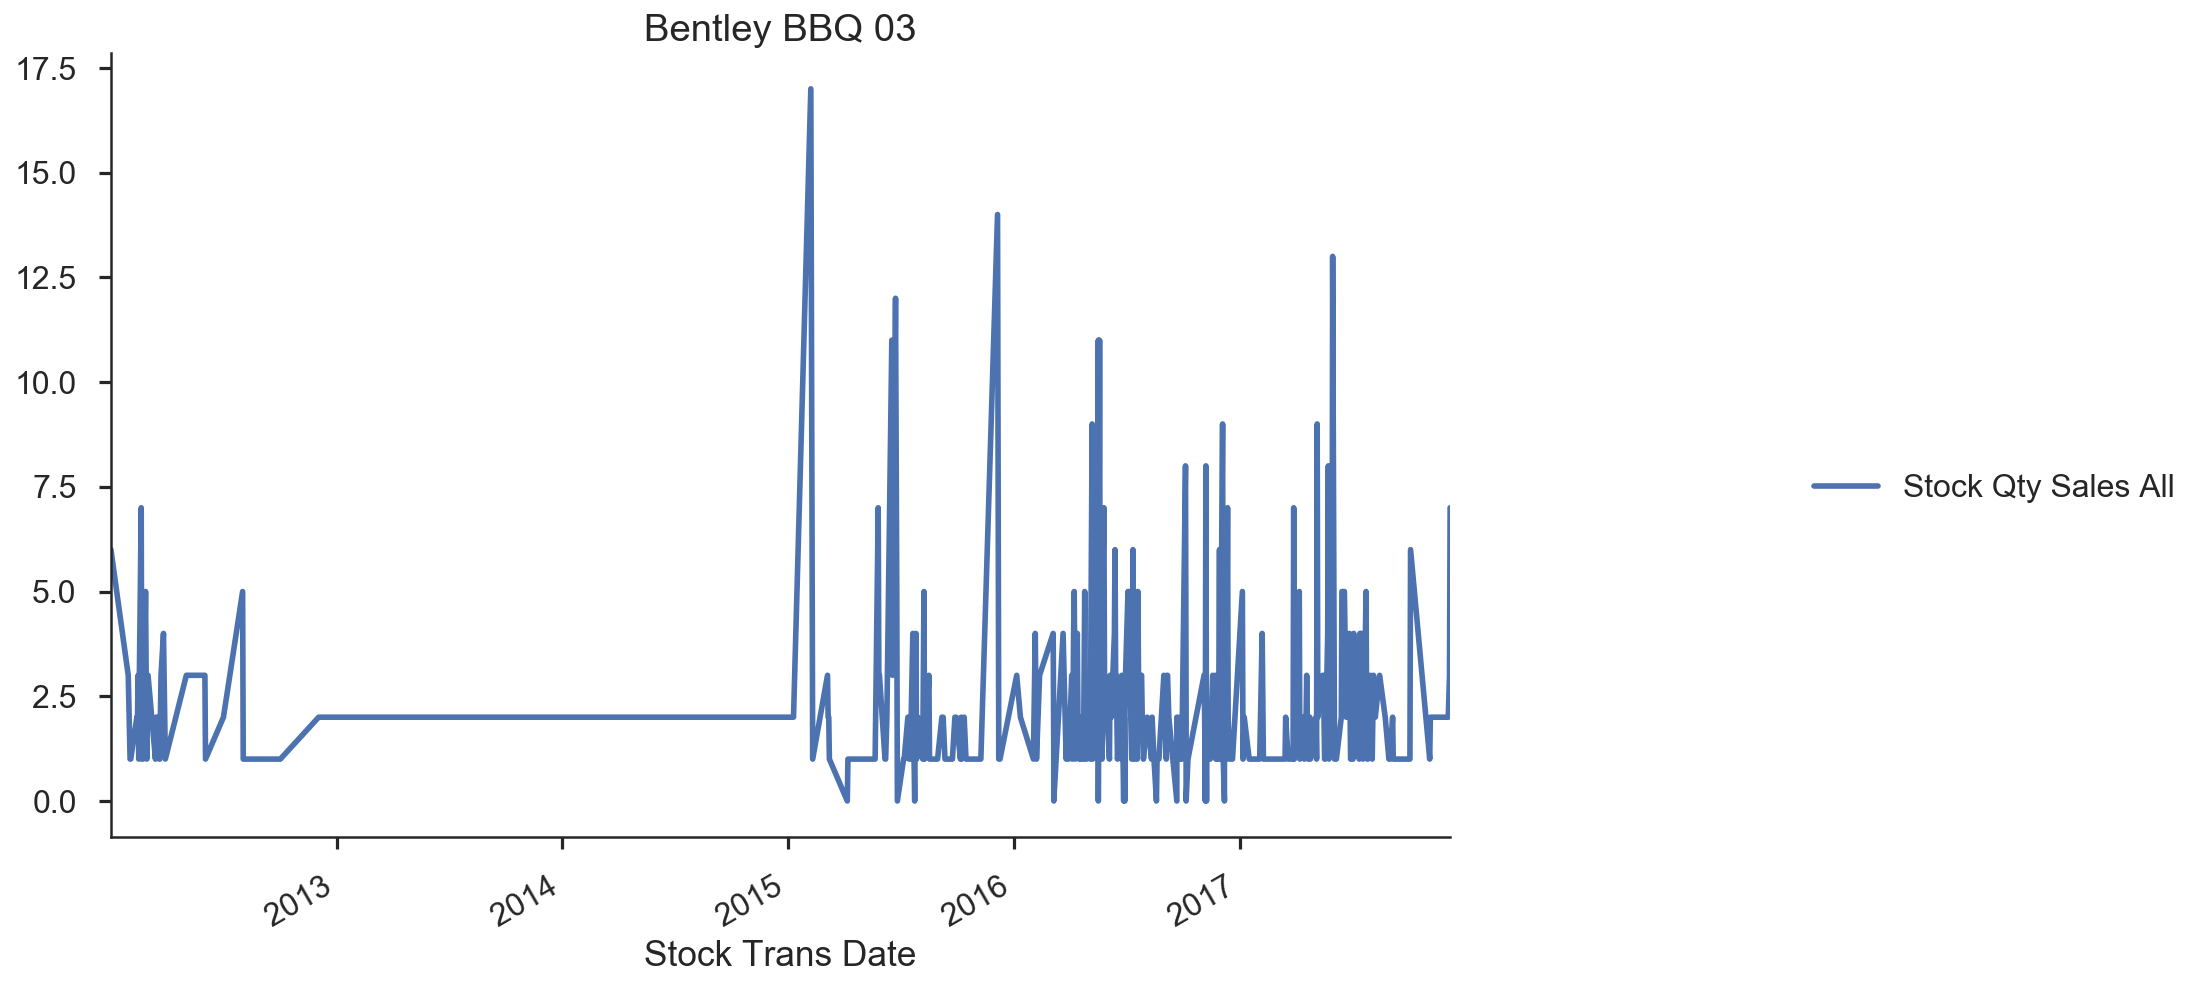

In [44]:
bentley.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title('Bentley BBQ 03')
sns.despine()

In [58]:
import datetime as dt
parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y')

In [59]:
data = pd.read_csv('data/bentley_bbq_03.csv',index_col=0, date_parser=parser)

In [60]:
data.head()

,Stock Qty Sales All
Stock Trans Date,
2012-01-30,3
2012-02-01,6
2012-02-02,1
2012-02-03,3
2012-02-06,3


In [52]:
data['Date'] = pd.to_datetime(pd.Series(data['Stock Trans Date']), format="%d/%m/%Y")


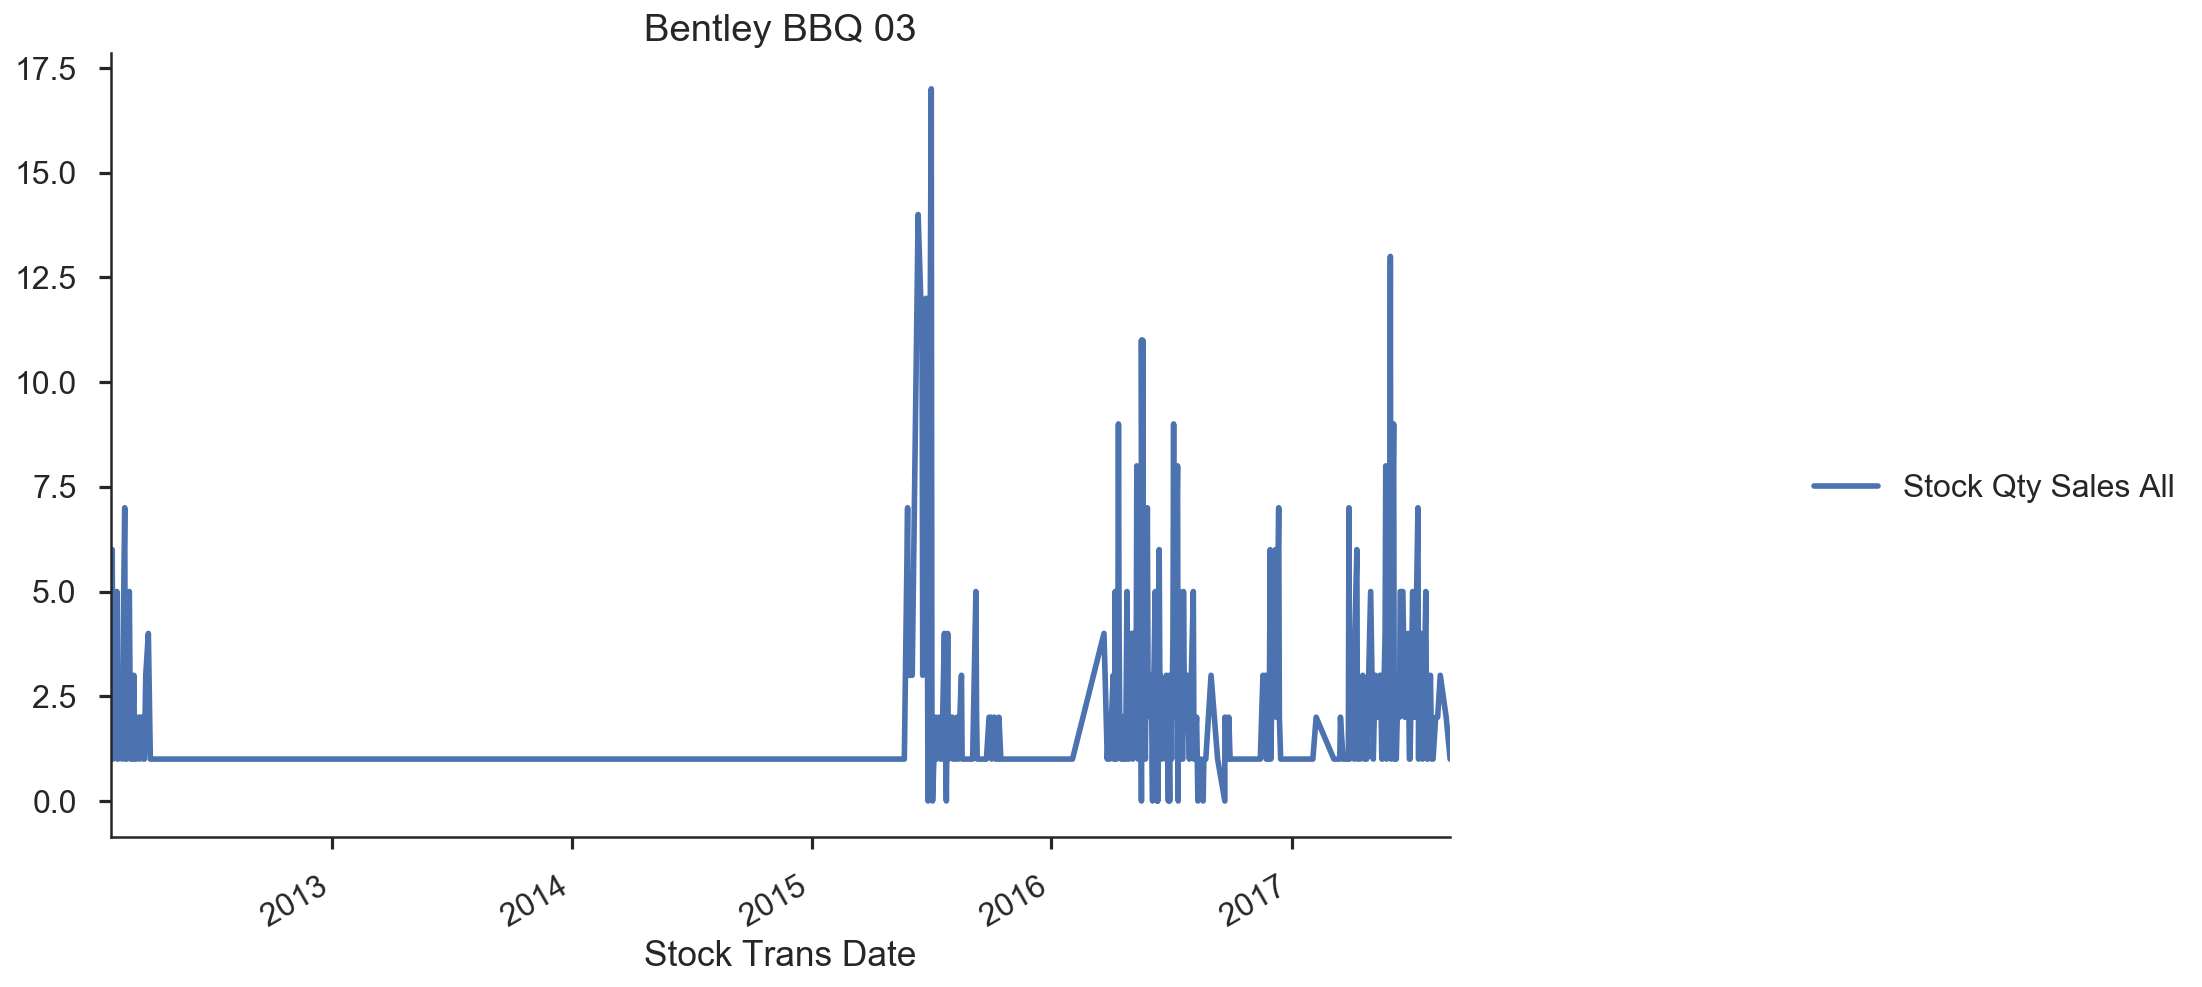

In [61]:
data.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title('Bentley BBQ 03')
sns.despine()

In [54]:
data.bbq = data['Stock Qty Sales All']

In [55]:
data.bbq

0       3
1       6
2       1
3       3
4       3
5       2
6       5
7       1
8       1
9       2
10      2
11      3
12      1
13      3
14      7
15      1
16      1
17      1
18      2
19      5
20      1
21      1
22      3
23      1
24      1
25      1
26      2
27      1
28      2
29      2
30      1
31      1
32      2
33      3
34      4
35      2
36      1
37      1
38      1
39      7
40      3
41      3
42      3
43     14
44     11
45      3
46     12
47      5
48      0
49     17
       ..
280     3
281     3
282     1
283     1
284     4
285     8
286     1
287     5
288     3
289    13
290     1
291     4
292     9
293     1
294     2
295     2
296     1
297     3
298     2
299     5
300     5
301     4
302     4
303     2
304     2
305     4
306     1
307     1
308     5
309     2
310     2
311     7
312     1
313     4
314     4
315     1
316     2
317     5
318     2
319     1
320     1
321     3
322     2
323     1
324     1
325     2
326     2
327     3
328     2
